<a href="https://colab.research.google.com/github/Alvanatus/Simulacion-ll/blob/main/cs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodología de la Simulación

### 1. Identifique las variables

En este caso, la posición aleatoria de puntos dentro de un cuadrado y cómo esta posición se relaciona con un círculo inscrito.

### 2. Determine la distribución de probabilidad

Para este caso, no hay una distribución de probabilidad definida como en otros casos, ya que estamos generando puntos aleatorios dentro del cuadrado.

### 3. Modele las variables aleatorias

Generaremos puntos aleatorios dentro del cuadrado. La distribución de estos puntos será uniforme.



### 4. Defina el modelo del sistema y los objetivos de la simulación

El modelo implica la generación de puntos aleatorios dentro del cuadrado y determinar cuántos de estos puntos están dentro del círculo inscrito.

### 5. Diseñe el experimento

Generaremos puntos aleatorios y contaremos cuántos caen dentro del círculo.



### 6. Repita el experimento $n$ veces

Repetiremos el proceso de generación de puntos y conteo para obtener una muestra grande de resultados.



## Ejemplo



**PASO 7** : Obtener la gráfica de estabilización.
Podemos monitorear la convergencia del resultado a medida que aumentamos el número de iteraciones.

**PASO 8**. Ejecutaremos el experimento varias veces para obtener una distribución de resultados.

**PASO 9**. Calcular la probabilidad de que un punto caiga dentro del círculo y su desviación estándar.
Esto nos dará una idea de la precisión de nuestra aproximación.

**PASO 10**. Calcular el intervalo de confianza.
Esto nos dará un rango dentro del cual esperamos que esté el valor verdadero de pi con cierta confianza.

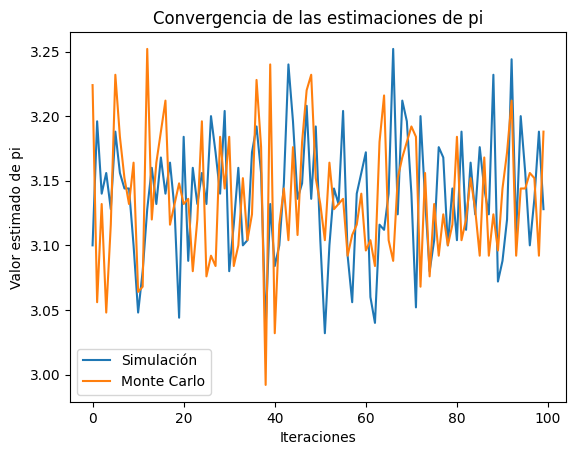

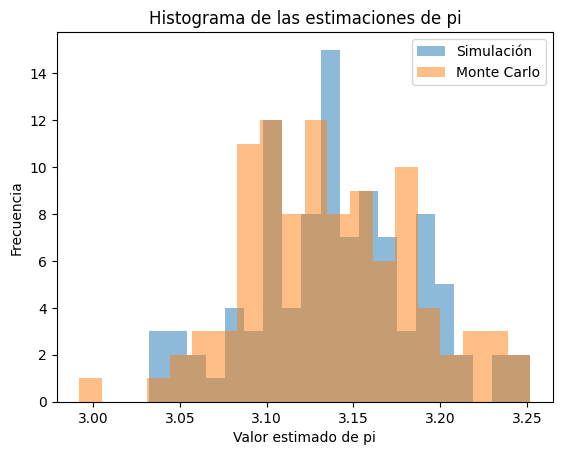

Media estimada de pi (Simulación): 3.1384000000000003
Desviación estándar de las estimaciones de pi (Simulación): 0.04746029919838267
Media estimada de pi (Monte Carlo): 3.13616
Desviación estándar de las estimaciones de pi (Monte Carlo): 0.04862894611237224
Intervalo de confianza al 95% (Simulación): [3.0419 3.2362]
Intervalo de confianza al 95% (Monte Carlo): [3.0518 3.232 ]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def generate_points(n):
    points = np.random.rand(n, 2) * 2 - 1  # Generar puntos aleatorios en el cuadrado [-1, 1] x [-1, 1]
    return points

def in_circle(points):
    return np.sum(np.linalg.norm(points, axis=1) <= 1)

def estimate_pi(n, iterations):
    pi_values = []
    for _ in range(iterations):
        points = generate_points(n)
        points_inside_circle = in_circle(points)
        pi_estimate = 4 * points_inside_circle / n
        pi_values.append(pi_estimate)
    return pi_values

def monte_carlo_pi(iterations):
    inside_circle = 0
    total_points = 0
    for _ in range(iterations):
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            inside_circle += 1
        total_points += 1
    pi_estimate = 4 * inside_circle / total_points
    return pi_estimate

iterations = 100
n = 1000

# Estimación de pi mediante simulación
pi_estimations = estimate_pi(n, iterations)

# Estimación de pi mediante Monte Carlo
monte_carlo_pi_estimations = [monte_carlo_pi(n) for _ in range(iterations)]

# Graficar la convergencia de las estimaciones de pi
plt.plot(np.arange(iterations), pi_estimations, label='Simulación')
plt.plot(np.arange(iterations), monte_carlo_pi_estimations, label='Monte Carlo')
plt.xlabel('Iteraciones')
plt.ylabel('Valor estimado de pi')
plt.title('Convergencia de las estimaciones de pi')
plt.legend()
plt.show()

# Histograma de las estimaciones de pi
plt.hist(pi_estimations, bins=20, alpha=0.5, label='Simulación')
plt.hist(monte_carlo_pi_estimations, bins=20, alpha=0.5, label='Monte Carlo')
plt.xlabel('Valor estimado de pi')
plt.ylabel('Frecuencia')
plt.title('Histograma de las estimaciones de pi')
plt.legend()
plt.show()

# Calcular la media y la desviación estándar de las estimaciones
mean_pi = np.mean(pi_estimations)
std_dev_pi = np.std(pi_estimations)
print("Media estimada de pi (Simulación):", mean_pi)
print("Desviación estándar de las estimaciones de pi (Simulación):", std_dev_pi)

mean_mc_pi = np.mean(monte_carlo_pi_estimations)
std_dev_mc_pi = np.std(monte_carlo_pi_estimations)
print("Media estimada de pi (Monte Carlo):", mean_mc_pi)
print("Desviación estándar de las estimaciones de pi (Monte Carlo):", std_dev_mc_pi)

# Calcular el intervalo de confianza al 95%
confidence_interval_sim = np.percentile(pi_estimations, [2.5, 97.5])
print("Intervalo de confianza al 95% (Simulación):", confidence_interval_sim)

confidence_interval_mc = np.percentile(monte_carlo_pi_estimations, [2.5, 97.5])
print("Intervalo de confianza al 95% (Monte Carlo):", confidence_interval_mc)


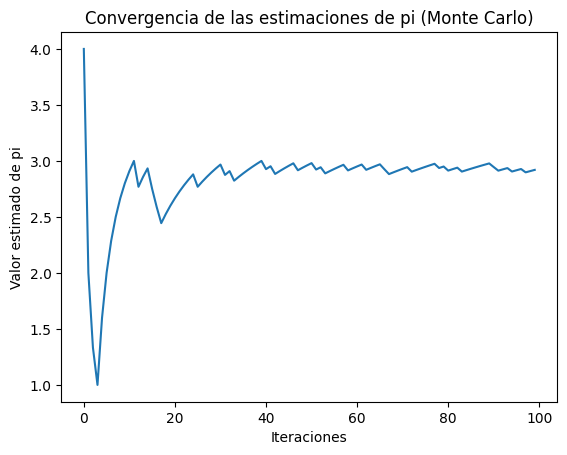

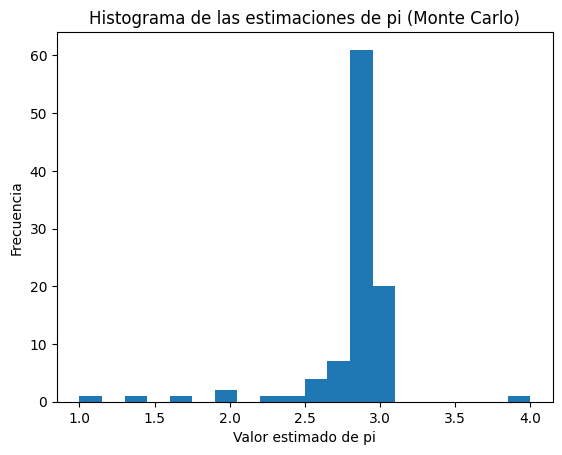

Media estimada de pi (Monte Carlo): 2.828678654979509
Desviación estándar de las estimaciones de pi (Monte Carlo): 0.3394959158673199
Intervalo de confianza al 95% (Monte Carlo): [1.79       2.99068627]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_pi(iterations):
    inside_circle = 0
    total_points = 0
    pi_values = []
    for i in range(iterations):
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            inside_circle += 1
        total_points += 1
        pi_estimate = 4 * inside_circle / total_points
        pi_values.append(pi_estimate)
    return pi_values

iterations = 100

# Estimación de pi mediante Monte Carlo
monte_carlo_pi_estimations = monte_carlo_pi(iterations)

# Graficar la convergencia de las estimaciones de pi mediante Monte Carlo
plt.plot(np.arange(iterations), monte_carlo_pi_estimations)
plt.xlabel('Iteraciones')
plt.ylabel('Valor estimado de pi')
plt.title('Convergencia de las estimaciones de pi (Monte Carlo)')
plt.show()

# Histograma de las estimaciones de pi mediante Monte Carlo
plt.hist(monte_carlo_pi_estimations, bins=20)
plt.xlabel('Valor estimado de pi')
plt.ylabel('Frecuencia')
plt.title('Histograma de las estimaciones de pi (Monte Carlo)')
plt.show()

# Calcular la media y la desviación estándar de las estimaciones de pi mediante Monte Carlo
mean_mc_pi = np.mean(monte_carlo_pi_estimations)
std_dev_mc_pi = np.std(monte_carlo_pi_estimations)
print("Media estimada de pi (Monte Carlo):", mean_mc_pi)
print("Desviación estándar de las estimaciones de pi (Monte Carlo):", std_dev_mc_pi)

# Calcular el intervalo de confianza al 95% para las estimaciones de pi mediante Monte Carlo
confidence_interval_mc = np.percentile(monte_carlo_pi_estimations, [2.5, 97.5])
print("Intervalo de confianza al 95% (Monte Carlo):", confidence_interval_mc)
